In [1]:
# Importando bibliotecas que vão ser utilizadadas para o tratamento, redução e visualização de alguns dados para tomada de decisão na escolha estratégica das variáveis de interesse
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
%matplotlib inline
pd.set_option('display.max_columns', None)
import dask.dataframe as dd
import os


In [2]:
# Lendo o arquivo que contem a base de dados e estruturando de acordo com a coluna tamanho
df = pd.read_csv('DATABASE/PNS_2019.csv', sep=';', low_memory=False)
df.head()


,V0001,V0024,UPA_PNS,V0006_PNS,V0015,V0020,V0022,V0026,V0031,V0025A,V0025B,A001,A002010,A003010,A004010,A01001,A011,A005010,A005012,A00601,A009010,A01401,A01402,A01403,A01501,A016010,A018011,A018012,A018013,A018014,A018015,A018016,A018017,A018018,A018019,A018020,A018021,A018022,A018023,A018024,A018025,A018026,A018027,A018028,A01901,A02101,A02102,A02201,A02305,A02306,A02307,A02308,A02401,A02402,B001,B002,B003,B004,C001,C00301,C004,C006,C00701,C00702,C00703,C008,C009,C01001,C010010,C013,C014,C015,C016,C017,C018,C01801,C011,C012,D001,D00201,D00202,D00301,D00501,D006,D00601,D007,D008,D00901,D010,D01101,D01201,D01301,D01302,D01303,D014,D015,E001,E002,E003,E004,E005,E006011,E008,E010010,E010011,E010012,E010013,E011,E01201,E01401,E014011,E01402,E01403,E01501,E01601,E01602,E01603,E01604,E01605,E017,E01801,E01802,E01803,E01804,E01805,E019,E022,E023011,E024011,E02402,E024021,E025,E02501,E02502,E02503,E026,E02601,E02801,E02802,E02803,E02804,E02805,E02806,E030,E03101,E03102,E03103,E03104,E03105,E03106,E03107,E03108,E032,E033,E027,F001011,F001021,F007011,F007021,F008011,F008021,VDF001,VDF00102,F016,G033,G034,G035,G036,G038,G039,G040,G041,G042,G044,G046,G047,G048,G049,G050,G051,G052,G053,G054,G055,G057,G058,G05801,G059,G060,G061,G062,G063,G064,G065,G066,G067,G068,G070,G071,G072,G073,G074,G075,G076,G077,G079,G080,G081,G082,G083,G084,G085,G086,G032,I00101,I00102,I001021,I00103,I001031,I005,I006,I004,I00401,I00402,I00403,I00404,I010010,I012,J001,J00101,J002,J003,J00402,J00404,J005,J006,J007,J00801,J009,J01002,J01101,J012,J01301,J014,J01502,J01602,J01701,J01802,J019,J02002,J021,J022010,J023,J024,J025,J026,J02702,J02901,J03001,J03102,J032,J03301,J034,J035,J03602,J037,J038,J039,J04001,J04002,J041,J042,J043,J044,J046,J047,J048,J049,J051,J052,J05301,J05402,J05403,J05404,J05405,J05406,J05407,J05408,J05409,J054010,J056,J057,J060,K001,K004,K007,K010,K013,K016,K019,K01901,K02001,K02101,K02102,K022,K025,K028,K031,K034,K03401,K03501,K03601,K03602,K04301,K04302,K04401,K045,K046,K047,K048,K050,K051,K052,K05302,K05401,K05402,k055,K05601,K05602,K062,L01701,L01702,L01703,L01704,L01705,L01706,L01707,L01708,L01709,L01710,L01711,L01712,L01713,L01714,L01715,L01716,L018,L019,L021,L022,L023,L024,L025,L026,L027,L028,L029,L030,L031,L032,L033,L034,L035,L036,L037,L038,L039,L040,L042,M001,M002,M00203,M00302,M00303,M00401,M00402,M005010,M005011,M00601,M007,M008,M009,M01001,M011011,M011021,M011031,M011041,M011051,M011061,M011071,M01401,M01501,M01601,M01701,M01801,M01901,N001,N00101,N004,N005,N006,N00701,N008,N010,N011,N012,N013,N014,N015,N016,N017,N018,O00101,O00401,O00402,O00501,O00201,O00701,O00801,O00802,O00803,O009,O00901,O010,O01102,O01401,O01501,O01602,O01702,O019,O02001,O021,O02101,O02201,O023,O02401,P00102,P00103,P00104,P00201,P00402,P00403,P00404,P00405,P005,P00601,P00602,P00603,P00604,P00605,P00607,P00608,P00609,P00610,P00611,P00612,P00613,P00614,P00615,P00616,P00617,P00618,P00619,P00620,P00621,P00622,P00623,P006,P00901,P01001,P01101,P013,P015,P02001,P02101,P01601,P018,P019,P02002,P02102,P023,P02401,P02501,P02602,P02601,P027,P02801,P029,P03201,P03202,P03001,P03301,P03302,P03303,P034,P035,P03701,P03702,P036,P038,P039,P03904,P03905,P03906,P040,P04001,P04101,P04102,P042,P04301,P04302,P044,P04401,P04405,P04406,P04501,P04502,P046,P04701,P04801,P04902,P050,P051,P052,P053,P05401,P05402,P05403,P05404,P05405,P05406,P05407,P05408,P05409,P05410,P05411,P05412,P05413,P05414,P05415,P05416,P05417,P05418,P05419,P05421,P05422,P055,P056,P05601,P05602,P05603,P05604,P05605,P057,P058,P05801,P05802,P05901,P05902,P05903,P05904,P05905,P05906,P060,P06101,P06102,P06103,P06104,P06105,P06106,P06302,P067,P06701,P068,P069,P06901,P07004,P07005,P07006,P07007,P07101,P07201,Q00101,Q00201,Q00202,Q003,Q00401,Q00502,Q00503,Q00601,Q00602,Q00801,Q009,Q010,Q01101,Q01202,Q014,Q015,Q016,Q017,Q018010,Q018011,Q018012,Q018013,Q018014,Q018015,Q018016,Q018017,Q01910,Q019101,Q01911,Q019111,Q01912,Q019121,Q01913,Q019131,Q022,Q02301,Q026,Q02701,Q028,Q02901,Q03001,Q03002,Q031,Q03201,Q03302,Q03303,Q03403,Q03404,Q

In [3]:
# Verificando as informações do dataframe e os tipos de dados das colunas criadas
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 293726 entries, 0 to 293725
Columns: 1087 entries, V0001 to VDDATA
dtypes: float64(1063), int64(9), object(15)
memory usage: 2.4+ GB


In [4]:
# Selecionando as variáveis de interesse e reduzindo a base
df = df[
   [
      'V0001',
      'Q092',
      'N00101',
      'N012',
      'N016',
      'N017',
      'N018',
      'P027',
      'P02801',
      'P029',
      'P03301',
      'P03001',
      'P03303',
      'Q09301',
      'Q094',
      'Q09502',
      'Q09606',
      'Q10101',
      'Q10701',
      'Q109',
      'C006',
      'C009',
      'J001',
      'J00402',
      'C008'
   ]
]

In [5]:
traducao = pd.read_json(os.getcwd() + '/DATABASE/Json/DD_Traducao.json')
traducao['Nomes Reduzidos']

C006                          Sexo
C008                         Idade
C009                          Raça
J001         Estado de Saúde Geral
J00402          Motivo Impedimento
N00101             Estado de Saúde
N012               Pouco Interesse
N016         Sentimento Depressivo
N017        Sentimento de Fracasso
N018               Ideação Suicida
P027                Consumo Álcool
P02801                 Dias Álcool
P029               Doses de Bebida
P03001          Dirigir Embriagado
P03301           Faltas por Bebida
P03303    Aviso Bebida Últimos 12M
Q092         Diagnóstico Depressão
Q09301           Idade Diagnóstico
Q094                Visita Regular
Q09502           Motivo Não Visita
Q09606           Toma Medicamentos
Q10101          Último Atendimento
Q10701         Compareceu Consulta
Q109           Limitação Atividade
V0001                           UF
Name: Nomes Reduzidos, dtype: object

In [6]:
# Renomeando as colunas
df = df.rename(columns=traducao['Nomes Reduzidos'])

In [7]:
def Heatmap(df):
   # Defina as cores personalizadas para ausência e presença de dados
   colors = ["#77BA99", "#FAFAF0"]

   # Definindo as cores do Heatmap
   cmap = sns.color_palette(colors)

   #Colocando o gráfico em horizontal
   df_transposto = df.T

   # Criando o mapa
   grafico = sns.heatmap(
      df_transposto.isnull(),
      yticklabels = True,
      xticklabels = False,
      cbar = False,
      cmap = cmap
   )

   grafico.set_title(
      "Heatmap da Ausência e Presença de Dados no Dataset",
      fontsize = 12,
      fontname = "serif",
      horizontalalignment = 'center'
   )

   # Crie a legenda personalizada com quadradinhos coloridos
   legend_labels = ["Presença", "Ausência"]
   legend_patches = [plt.Rectangle((0, 0), 1, 1, color=color) for color in colors]
   grafico.legend(legend_patches, legend_labels, loc='center left', bbox_to_anchor=(1.0, 0.5), title="Legenda")


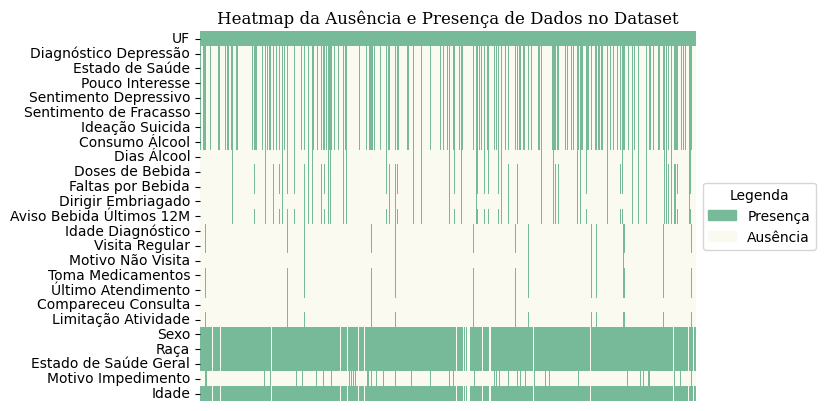

In [8]:
Heatmap(df)

In [9]:
# Converte colunas para número flutuante
df = df.astype(float)
df.dtypes

UF                          float64
Diagnóstico Depressão       float64
Estado de Saúde             float64
Pouco Interesse             float64
Sentimento Depressivo       float64
Sentimento de Fracasso      float64
Ideação Suicida             float64
Consumo Álcool              float64
Dias Álcool                 float64
Doses de Bebida             float64
Faltas por Bebida           float64
Dirigir Embriagado          float64
Aviso Bebida Últimos 12M    float64
Idade Diagnóstico           float64
Visita Regular              float64
Motivo Não Visita           float64
Toma Medicamentos           float64
Último Atendimento          float64
Compareceu Consulta         float64
Limitação Atividade         float64
Sexo                        float64
Raça                        float64
Estado de Saúde Geral       float64
Motivo Impedimento          float64
Idade                       float64
dtype: object

In [10]:
# Atualizando a idade das pessoas para o ano de 2023
df['Idade'] = df['Idade'] + 4.0
df['Idade']

0         59.0
1         73.0
2         35.0
3         13.0
4         10.0
          ... 
293721    53.0
293722    88.0
293723    25.0
293724    17.0
293725     NaN
Name: Idade, Length: 293726, dtype: float64

In [11]:
# Pessoas que tiveram diagnóstico de depressão: 1.0, Pessoas que não tiveram: 2.0
counts = df['Diagnóstico Depressão'].value_counts()
counts

2.0    82514
1.0     8332
Name: Diagnóstico Depressão, dtype: int64

In [12]:
# Filtros para buscar possível diagnóstico de não depressão

# Condição 1: Diagnóstico de depressão é nulo ou igual a 2.0
condicao1 = df['Diagnóstico Depressão'].isin([None, 2.0])

# Condição 2: Consumo de álcool é 1.0 ou 2.0
condicao2 = df['Consumo Álcool'].isin([1.0, 2.0])

# Condição 3: Sentimento depressivo é 1.0 ou 2.0
condicao3 = df['Sentimento Depressivo'].isin([1.0, 2.0])

# Condição 4: Estado de saúde é igual a 1.0
condicao4 = df['Estado de Saúde'] == 1.0

# Condição 5: Motivo de impedimento não é igual a 12.0
condicao5 = df['Motivo Impedimento'] != 12.0

# Aplicando todas as condições de filtros para obter o DataFrame final
df_possivel_sem_depressao = df.loc[condicao1 & condicao2 & condicao3 & condicao4 & condicao5]

df_possivel_sem_depressao.shape

(8444, 25)

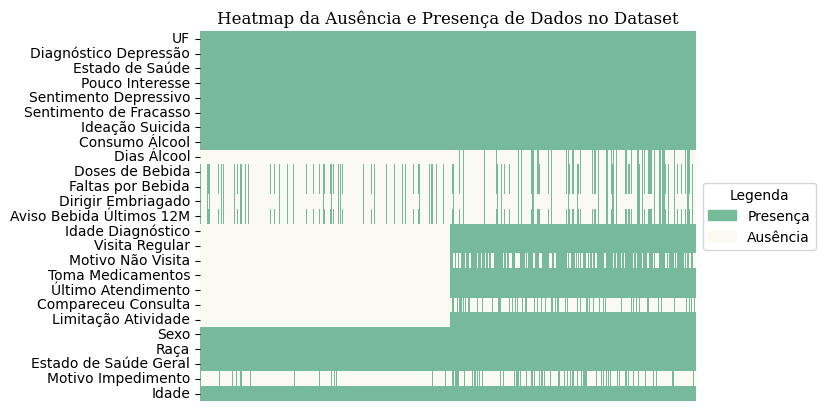

In [13]:
# Juntando dados de depressão e não depressão
condicao = df['Diagnóstico Depressão'] == 1.0
df_so_depressao = df.loc[condicao]

df_tratado = pd.concat([df_possivel_sem_depressao, df_so_depressao], axis=0)
Heatmap(df_tratado)

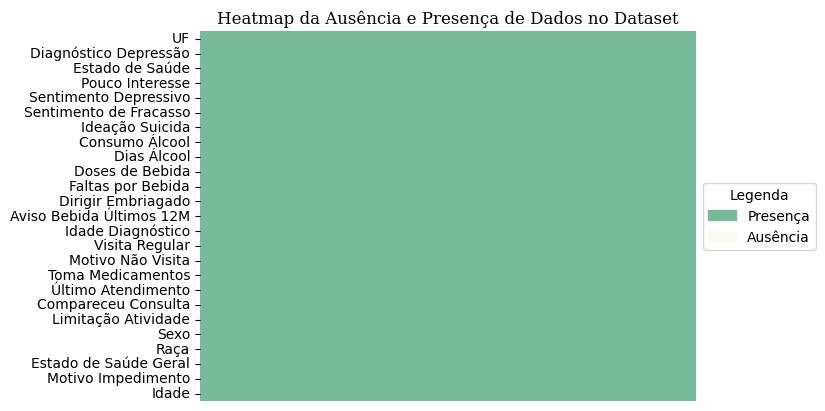

In [14]:
df_tratado.fillna(0, inplace=True)
Heatmap(df_tratado)


In [15]:
# Salvando arquivo reduzido como csv
df_tratado.to_csv(os.getcwd() + '/DATABASE/base-reduzida-v3.csv', sep=',', encoding='utf-8')